# <font color = blue> Lead Scoring Case Study </font>

#  <font color = blue> Problem Statement </font>


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



In [183]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [184]:
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

#option set for columns
pd.set_option("display.max_columns",100)
pd.set_option("display.max_colwidth",200)



In [185]:
# Importing the dataset

df = pd.read_csv("leads.csv")
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [186]:
# Analyzing the shape of our dataset (i.e., understanding how many rows and columns are present)

df.shape

(9240, 37)

In [187]:
#Checking the datatypes of the columns present in our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [188]:
#dtypes for each column

df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [189]:
# Checking the columns of our dataset

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [190]:
#Checking the Summary of numeric columns in the dataset

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [191]:
#checking for the duplicate datas in our dataset

(df[df.duplicated()].sum()).sum()

0.0

#####  There is no duplicate data's in our dataset


## <font color = green> Step 2: Data Cleaning - Checking Data Quality, Dropping the unwanted / redundant columns </font>



In [192]:
#Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value
# Hence replacing 'Select' values with NaN.

df = df.replace('Select', np.nan)

In [193]:
# Checking the head
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [194]:
# we can remove Prospect ID and Lead Number since they are just identity number to specify customers.

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [195]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [196]:
df.shape

(9240, 35)

### 2.1. Analyzing and imputing/removing of Null values

In [197]:
# checking null values in our dataset

(round(df.isnull().mean()*100, 2)).sort_values(ascending = False)


How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Converted 

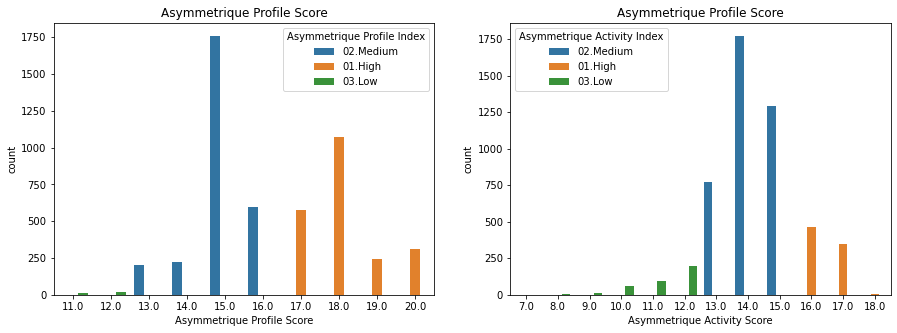

In [198]:
# Let us now observe the index and score assigned to each customer based on their activity and their profile

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['Asymmetrique Profile Score'], hue=df['Asymmetrique Profile Index'], )
plt.title('Asymmetrique Profile Score')

plt.subplot(1,2,2)
sns.countplot(df['Asymmetrique Activity Score'], hue=df['Asymmetrique Activity Index'])
plt.title('Asymmetrique Profile Score')
plt.show()



Notes:

The columns 'Asymmetrique Profile Score' and 'Asymmetrique Activity Score' are well described by another two columns which is 'Asymmetrique Profile Index' and 'Asymmetrique Activity Index' and more move these columns are having null percentage more than 40 and there is no significance of having this columns in our analysis. Hence we can remove these columns

In [199]:
# checking the counts of the below columns

print(df['How did you hear about X Education'].value_counts(dropna=False))
print('*'*100)
print(df['Lead Profile'].value_counts(dropna=False))
print('*'*100)
print(df['Lead Quality'].value_counts(dropna=False))

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
****************************************************************************************************
NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
****************************************************************************************************
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


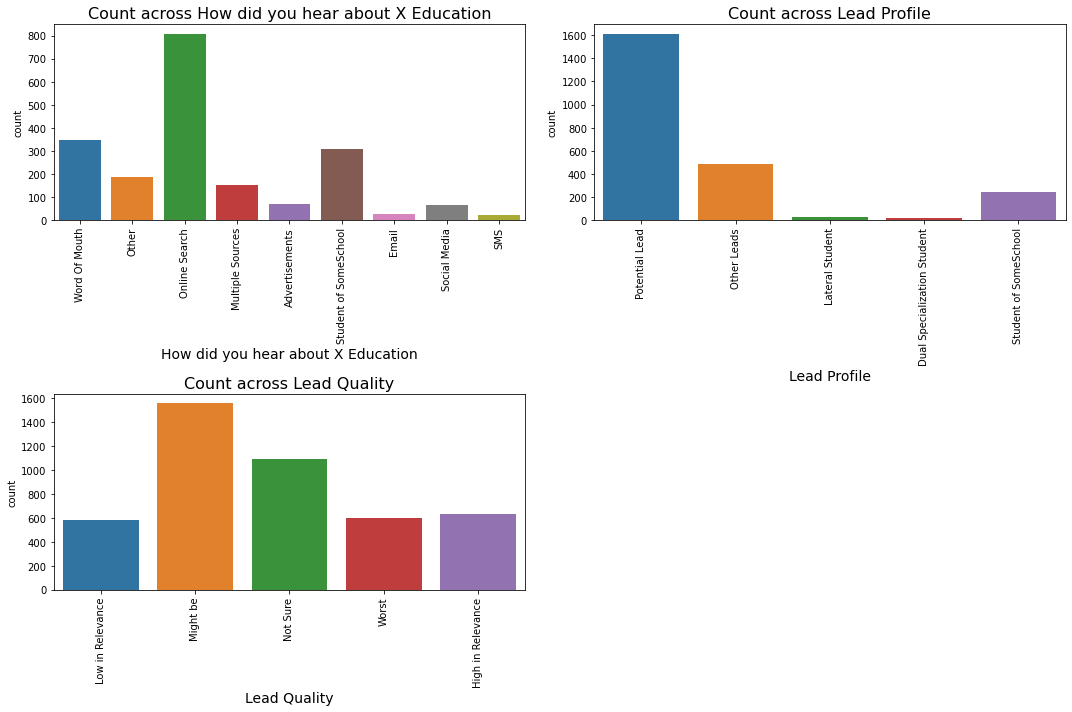

In [200]:
# Plot to see the counts of the columns'How did you hear about X Education', 'Lead Profile','Lead Quality'
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Lead Quality',3)

plt.tight_layout()

We can also remove the above columns because.

- column 'How did you hear about X Education' tells the source from which the customer heard about X Education and more over it is having 78% null values. Hence we can remove this.

- column 'Lead Profile' describes A lead level assigned to each customer based on their profile and having null values of about 74%, no meaning in having this column for our analysis.

- column 'Lead Quality' Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead and having null values of about 51%. So, we can remove this as well.




In [201]:
# As per the above analysis. We can remove the values from the column which is having more than 40% of null values
col = df.columns
for i in col:
    if ((round(df[i].isnull().mean()*100, 2))>40):
        df.drop(i,1,inplace = True)


In [202]:
# Checking null values again

(round(df.isnull().mean()*100, 2)).sort_values(ascending = False).head(10)


City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [203]:
# Analyzing the null values in 'City column'

df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Since Mumbai is the most common occurence other than NaN, we can impute all the missing values with this.

In [204]:
# Replacing the Null values with 'Mumbai'

df['City'] = df['City'].replace(np.nan,'Mumbai')

# Checking the column after replacing the null values
df['City'].isnull().sum()

0

In [205]:
# Analyzing null values in 'specialization column'

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

For the columns having 'Nan', we can assume that, these rows are left by students who are yet to graduate. Hence we can replaces these null values with the more genric term 'Not Specified'.

In [206]:
# Replacing the null values in specialization coulmn as 'Not defined'

df['Specialization'] = df['Specialization'].replace(np.NaN, 'Not defined')

# Checking the column after replacing the null values
df['Specialization'].isnull().sum()

0

We also see that specialization with Management in them have higher number of counts and we can club the speciliazation with similar roles like 'Management

In [207]:
# Let us now combine all the management related roles into one
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 


In [208]:
# Analyzing null values in the 'Tags column'

df['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [209]:
# imputing the null values with Not Specified, since we may assume that the customer may not be interested right now

df['Tags'] = df['Tags'].replace(np.NaN, 'Not defined')

# Checking the column after replacing the null values
df['Tags'].isnull().sum()


0

In [210]:
#Tags assigned to customers indicate the current status of the lead.
# So, we will combine the low frequency tags with the relevent tags

df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized', 'switched off',
                                    'Already a student',
                                    'Not doing further education',
                                    'invalid number',
                                    'wrong number given'], 'Others')



In [211]:
# checking unique roles
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Not defined',
       'Lost to EINS', 'Others', 'Busy', 'Graduation in progress',
       'Closed by Horizzon', 'Interested  in full time MBA'], dtype=object)

In [212]:
# Analyzing the null values in the 'What matters most to you in choosing a course column'

df['What matters most to you in choosing a course'].value_counts(dropna = False)



Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [213]:
# Replacing the null values to the most common occurance. i.e.,'Better Career Prospects'.

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.NaN, 'Better Career Prospects')

# Checking the column after replacing the null values
df['What matters most to you in choosing a course'].isnull().sum()

0

In [214]:
# Analyzing the null values in the 'Country column'

df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
Sweden                     3
China                      2
Italy                      2
Belgium                    2
Netherlands                2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Philippines                2
Ghana                      2
Switzerland                1
Kenya                      1
Tanzania                   1
Liberia                    1
Malaysia                   1
Russia        

In [215]:
df['Country'] = df['Country'].replace(np.NaN, 'India')

# Checking the column after replacing the null values
df['Country'].isnull().sum()


0

In [216]:
# Analyzing the null values in the 'Lead Source column'

df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [217]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')
# Checking the column after replacing the null values
df['Lead Source'].isnull().sum()

0

In [218]:
# Analyzing the null values in the 'Last Activity' column
    
df['Last Activity'].value_counts(dropna = False)


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [219]:
# Replacing null values with others

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

# Checking the column after replacing the null values
df['Last Activity'].isnull().sum()

0

In [220]:
# combing all low count roles together in one category to make analysis more easier.

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')


In [221]:
# Checking the null values again

(round(df.isnull().mean()*100, 2)).sort_values(ascending = False).head()

What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
dtype: float64

In [222]:
# Analyzing the null values for the below column
df['What is your current occupation'].value_counts(dropna = False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [223]:
#imputing Nan values with mode "Unemployed", since it is the most frequently occured field.

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

# Checking the column after replacing the null values
df['What is your current occupation'].isnull().sum()


0

In [224]:
# Analyzing the below column
df['Page Views Per Visit'].value_counts(dropna = False)


0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [225]:
# Analyzing the below column
df['TotalVisits'].value_counts(dropna = False)


0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [226]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [227]:
# changing the dtype from flot to int for the below column

df['TotalVisits'] = df['TotalVisits'].astype('int64')
df['Page Views Per Visit'] = df['Page Views Per Visit'].astype('int64')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9103 non-null   object
 1   Lead Source                                    9103 non-null   object
 2   Do Not Email                                   9103 non-null   object
 3   Do Not Call                                    9103 non-null   object
 4   Converted                                      9103 non-null   int64 
 5   TotalVisits                                    9103 non-null   int64 
 6   Total Time Spent on Website                    9103 non-null   int64 
 7   Page Views Per Visit                           9103 non-null   int64 
 8   Last Activity                                  9103 non-null   object
 9   Country                                        9103 non-null   

In [229]:
df.shape

(9103, 28)

In [230]:
#Checking percentage of Null Values in All Columns:

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

We have handled all the Null values in our dataset

## <font color = green> Step 3:Outlier and Data Imbalance Handling </font>


### 3.1. Analyzes on Categorical variables

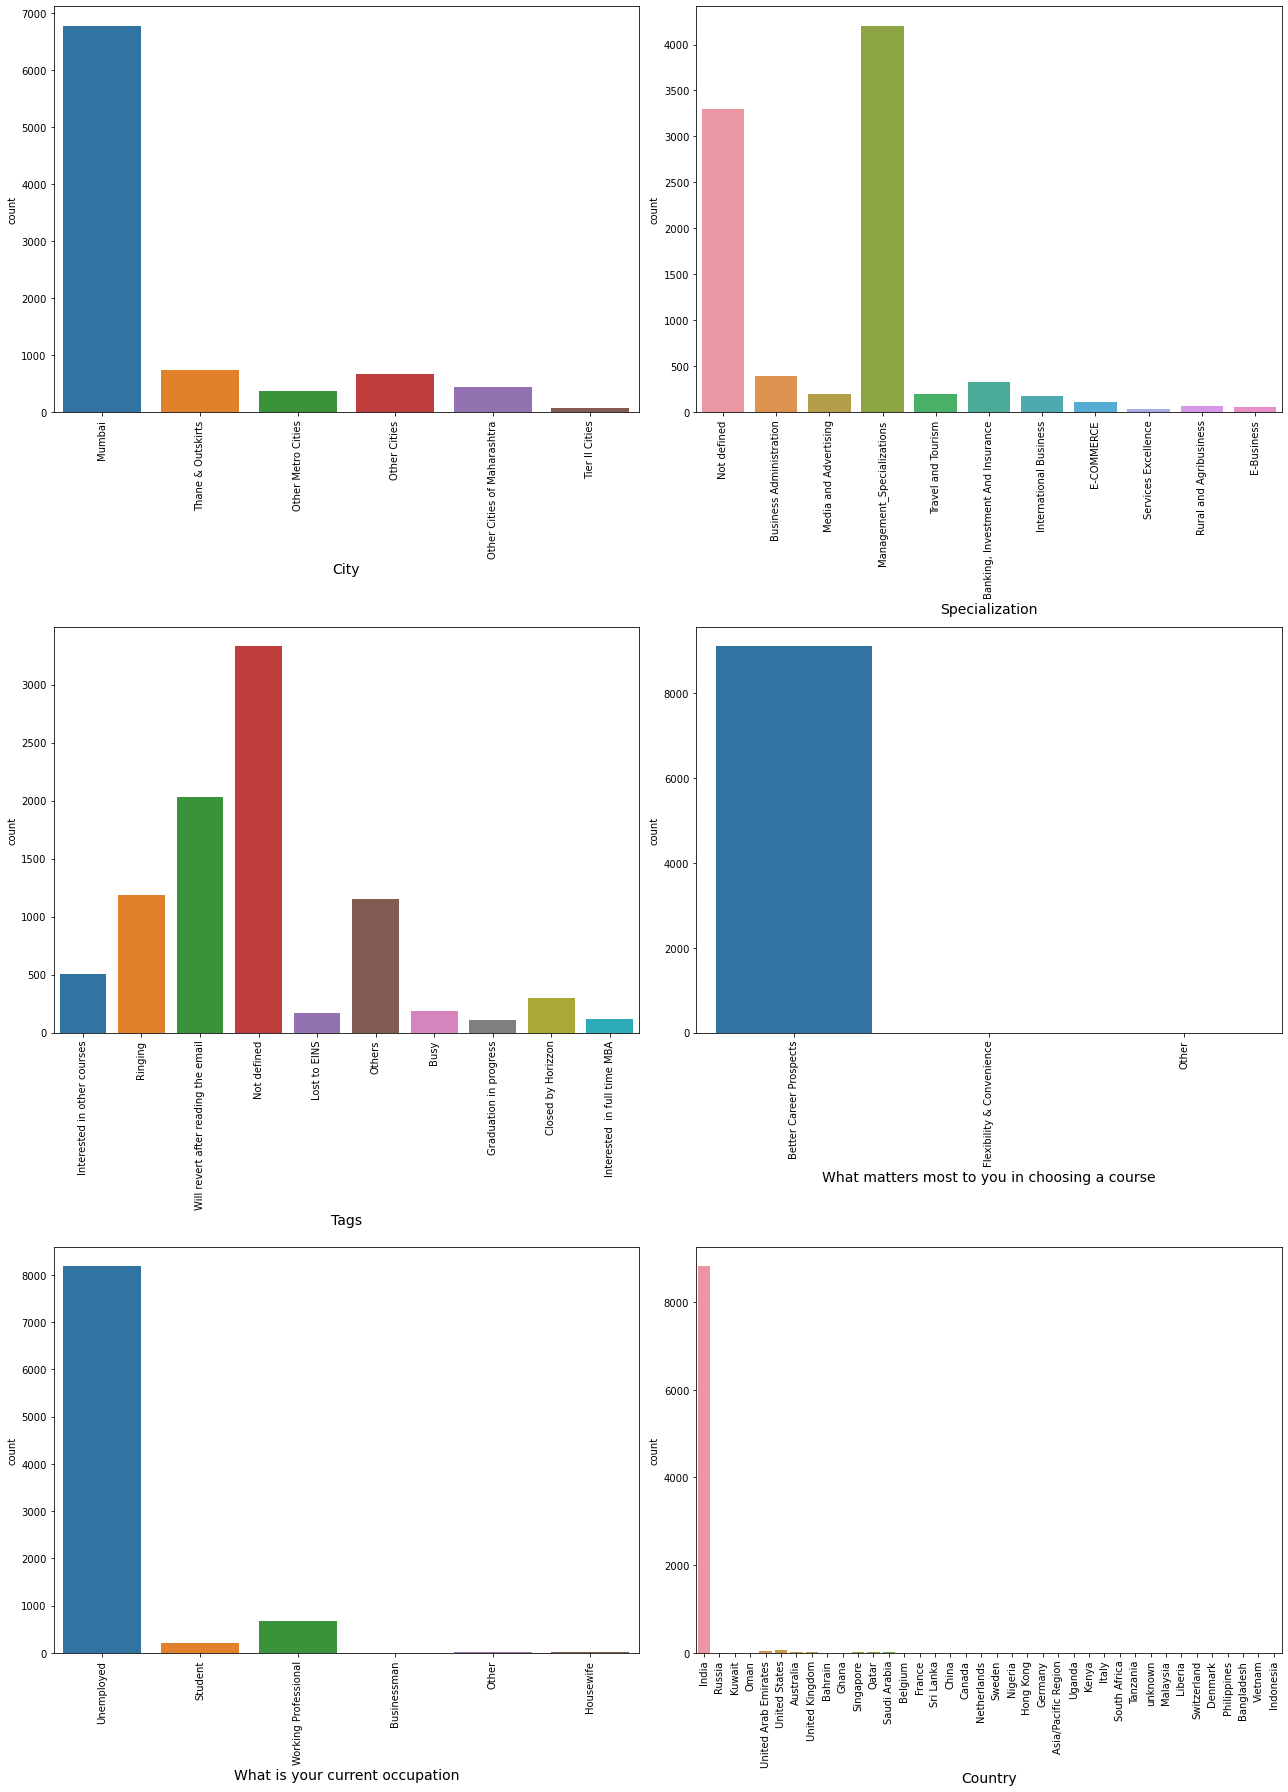

In [231]:
# Plot to analyze the outliers for categorical variables.

def countplot(x, fig ):
    plt.subplot(3,2, fig)
    sns.countplot(df[x])
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
    
plt.figure(figsize=(18,25))

countplot('City',1)
countplot('Specialization',2)
countplot('Tags',3)
countplot('What matters most to you in choosing a course',4)
countplot('What is your current occupation',5)
countplot('Country',6)



plt.tight_layout()

From the above graphs, we can see that the columns Country, What matters most to you in choosing a course shows high data imbalance, which will affect the result of our model. Hence removing thses columns.

In [232]:
#dropping columns
df = df.drop(['Country', 'What matters most to you in choosing a course'],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Lead Origin                               9103 non-null   object
 1   Lead Source                               9103 non-null   object
 2   Do Not Email                              9103 non-null   object
 3   Do Not Call                               9103 non-null   object
 4   Converted                                 9103 non-null   int64 
 5   TotalVisits                               9103 non-null   int64 
 6   Total Time Spent on Website               9103 non-null   int64 
 7   Page Views Per Visit                      9103 non-null   int64 
 8   Last Activity                             9103 non-null   object
 9   Specialization                            9103 non-null   object
 10  What is your current occupation           9103 n

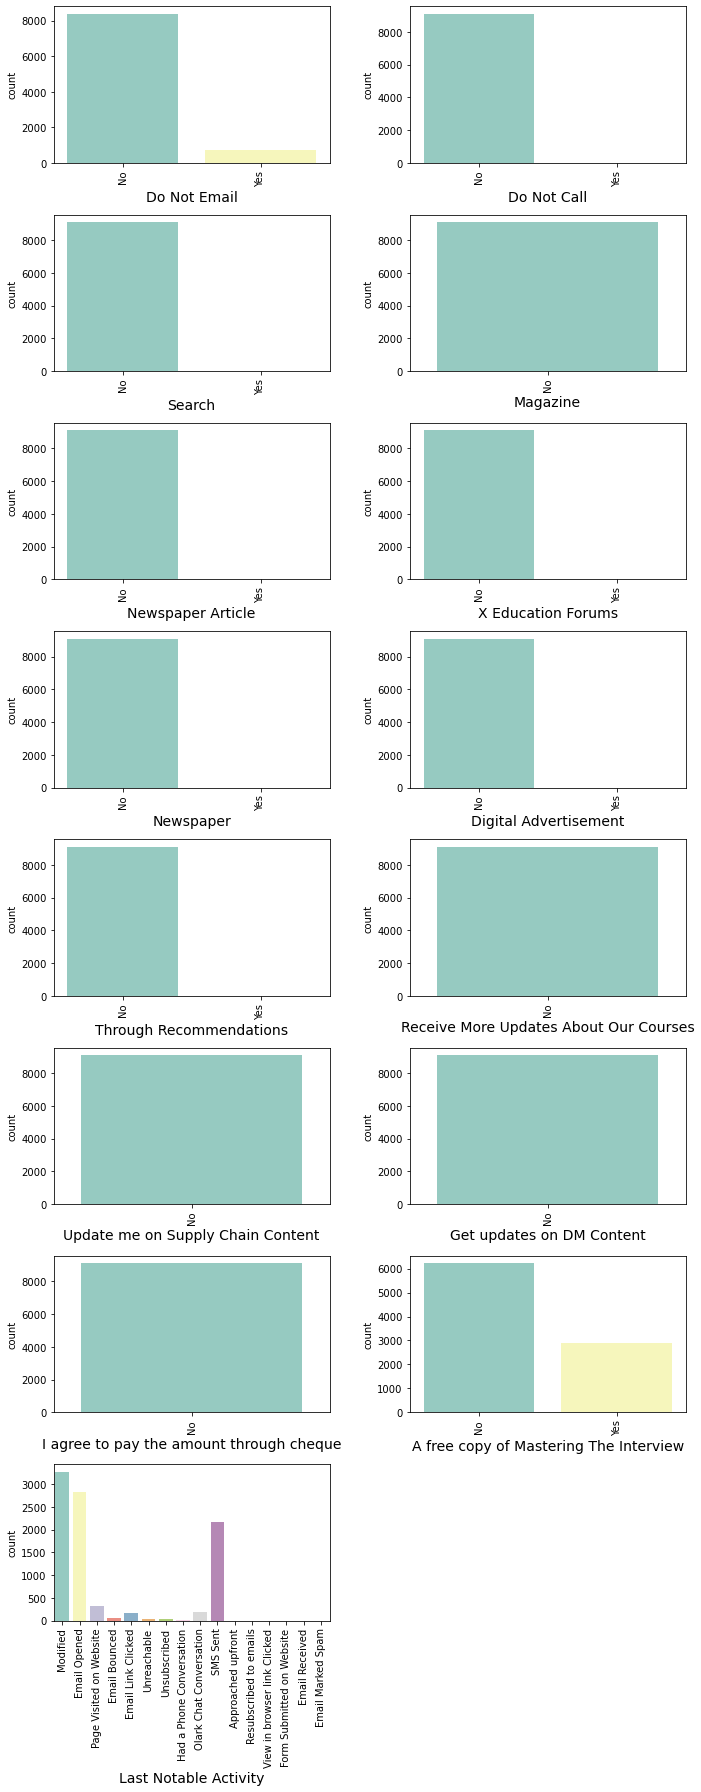

In [233]:
# Again Plot to analyze the outliers for categorical variables.

def countplot(x, fig ):
    plt.subplot(8,2, fig)
    sns.countplot(df[x], palette="Set3")
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)
    
plt.figure(figsize=(10,25))
 

countplot('Do Not Email',1)
countplot('Do Not Call',2)
countplot('Search',3)
countplot('Magazine',4)
countplot('Newspaper Article',5)
countplot('X Education Forums',6)
countplot('Newspaper',7)
countplot('Digital Advertisement',8)
countplot('Through Recommendations',9)
countplot('Receive More Updates About Our Courses',10)
countplot('Update me on Supply Chain Content',11)
countplot('Get updates on DM Content',12)
countplot('I agree to pay the amount through cheque',13)
countplot('A free copy of Mastering The Interview',14)
countplot('Last Notable Activity',15)



plt.tight_layout()

Inference

- From the above graphs, we can see that these columns shows high data imbalance, which will affect the result of our model. Hence removing these expect 'Do Not Email','A free copy of Mastering The Interview' and 'last Notable Acfivity'.

- For the Last Notable Activity column, we can combine the most similar values.



In [234]:
# Analyzse the below column:

df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [235]:
#Combinig the most similar/low frequency values for 'Last Notable Activity'

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [236]:
# Removing the imbalance columns

#adding imbalanced columns to the list of columns to be dropped

cols = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Do Not Call',
                 'Get updates on DM Content','I agree to pay the amount through cheque']
df = df.drop(cols,1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9103 non-null   object
 1   Lead Source                             9103 non-null   object
 2   Do Not Email                            9103 non-null   object
 3   Converted                               9103 non-null   int64 
 4   TotalVisits                             9103 non-null   int64 
 5   Total Time Spent on Website             9103 non-null   int64 
 6   Page Views Per Visit                    9103 non-null   int64 
 7   Last Activity                           9103 non-null   object
 8   Specialization                          9103 non-null   object
 9   What is your current occupation         9103 non-null   object
 10  Tags                                    9103 non-null   object
 11  City

## 3.2. Analyzes on Numerical variables:


In [237]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.293639
std,0.485464,4.854853,545.066142,2.165837
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000
99%,1.000000,17.000000,1838.960000,9.000000


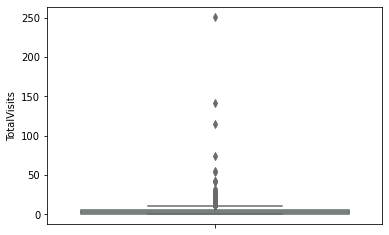

In [238]:
#visualizing the spread for the variable Total Visits

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'], palette='Set3')
plt.show()

We can see the outliers present from the above boxplot

In [239]:
#let us noe check the percentile for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

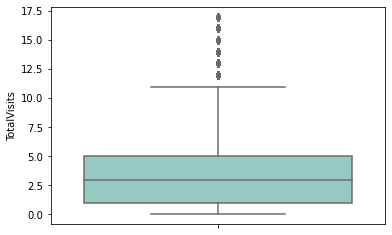

In [240]:
# We are removing the outliers after deriving its percentiles.
# The data point above 0.99 and below 0.01 can be removed and visualize it.

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'], palette='Set3')
plt.show()

In [241]:
df.shape

(9020, 14)

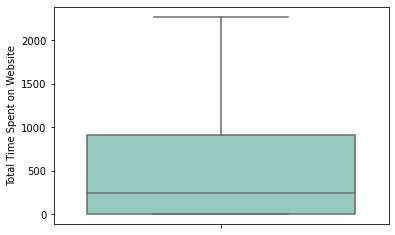

In [242]:
#visualizing the spread for the variable 'Total Time Spent on Website'

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'], palette='Set3')
plt.show()

In [243]:
#let us now check percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

There is no outliers present for the above column

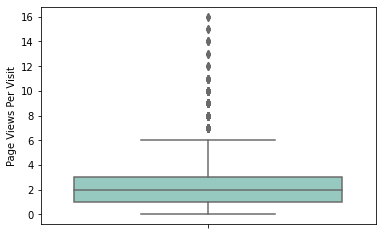

In [244]:
#visualizing the spread for the variable 'Page Views Per Visit'

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'], palette='Set3')
plt.show()

In [245]:
df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.270843
std         2.068441
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

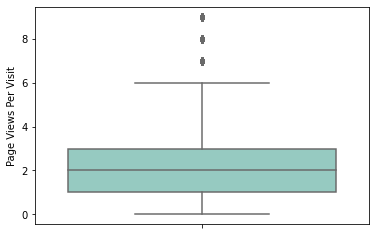

In [246]:
# We are removing the outliers after deriving its percentiles.
# The data point above 0.99 and below 0.01 can be removed and visualize it.

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df=df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]
sns.boxplot(y=df['Page Views Per Visit'], palette='Set3')
plt.show()

In [247]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8953.000000,8953.000000,8953.000000,8953.000000
mean,0.379203,3.143081,477.736401,2.199933
std,0.485216,2.903799,544.180321,1.899394
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,5.000000,911.000000,3.000000
90%,1.000000,7.000000,1370.000000,5.000000
95%,1.000000,9.000000,1553.000000,6.000000
99%,1.000000,13.000000,1837.960000,8.000000


In [248]:
df.shape

(8953, 14)

## <font color = green> Step 4:Data visualization </font>


In [249]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## 4.1. EDA on Categorical variables

In [250]:
def showplot(x):
    

    plot = sns.catplot(x, kind="count", hue ='Converted', data=df, palette="seismic", aspect = 2);
    plt.title('Plot to see the distribution of'+ ' ' + x, size = 20)
    plt.xlabel(x,size = 20)
    plt.ylabel("Count", fontsize = 20)
    plt.xticks(rotation = 90)

    # Print the counts
    ax = plot.facet_axis(0,0)
    for p in ax.patches:
    
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
    
        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
    plt.show()

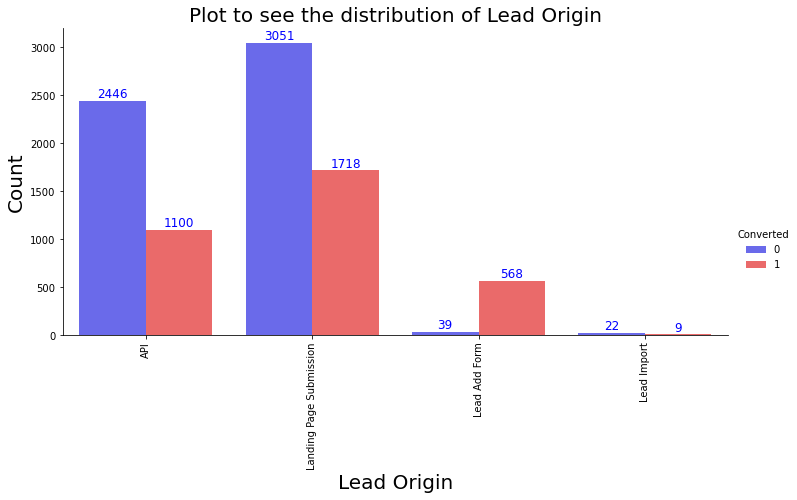

In [251]:
#Plot to see the distribution of the variable 'Lead Origin'
showplot('Lead Origin')

Inference:


From the above graph, it can be seen that major conversion in the lead origin is from 'Landing page submission' followed by 'API'.

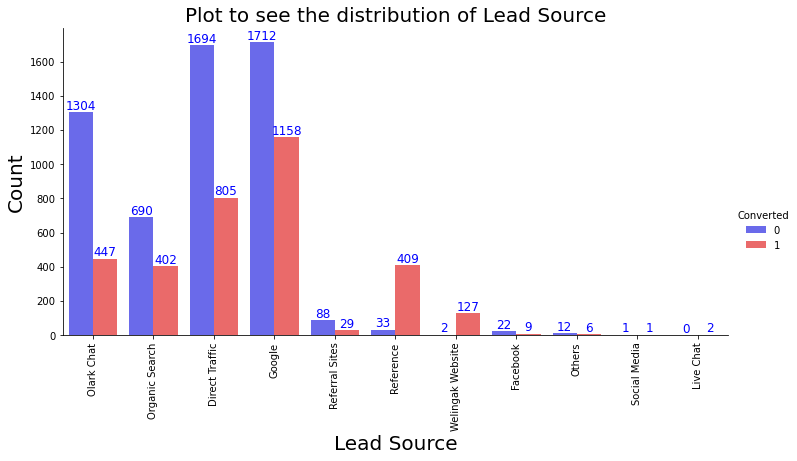

In [252]:
#Plot to see the distribution of the variable 'Lead Source'
showplot('Lead Source')

Inference:

From the above graph, it can be seen that major conversion in the lead source is from google

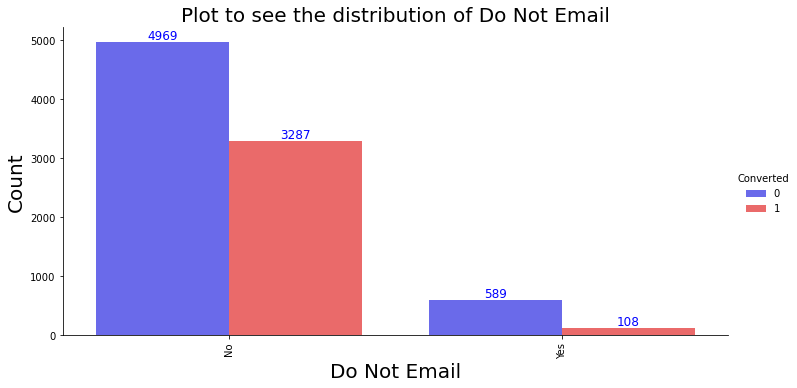

In [253]:
#Plot to see the distribution of the variable 'Do Not Email'
showplot('Do Not Email')

Inference

Based on the above graph, major conversion has happend from the emails that have been sent

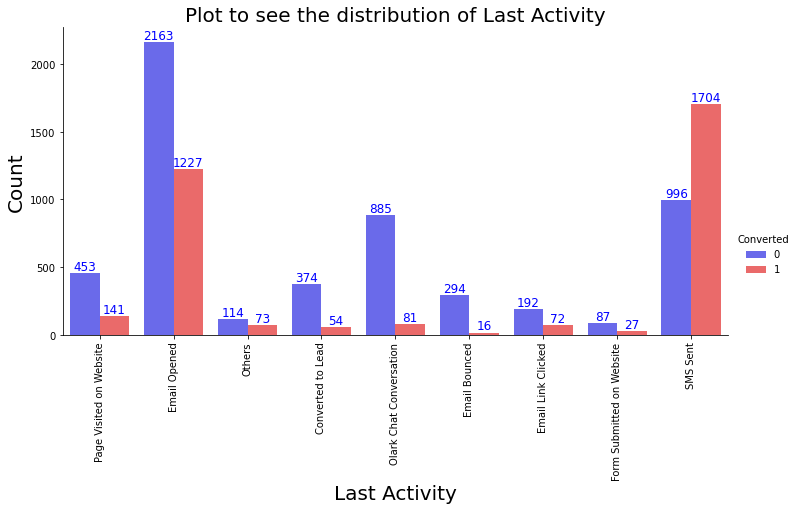

In [254]:
#Plot to see the distribution of the variable 'Last Activity'
showplot('Last Activity')

Inference:

As per the above graph, last activity value of 'Email opened' had more conversion

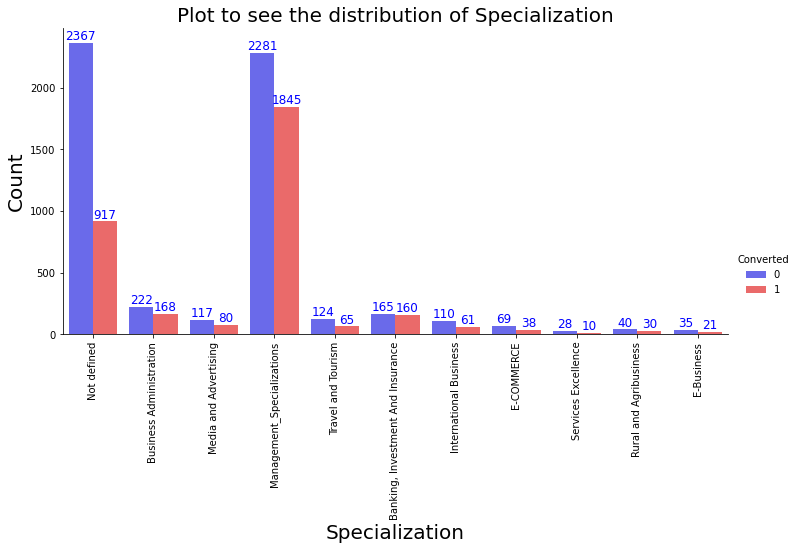

In [255]:
#Plot to see the distribution of the variable 'Specialization'
showplot('Specialization')

Inference

From the above plot we can see that the conversion rate is high for not defined and the Management related studies

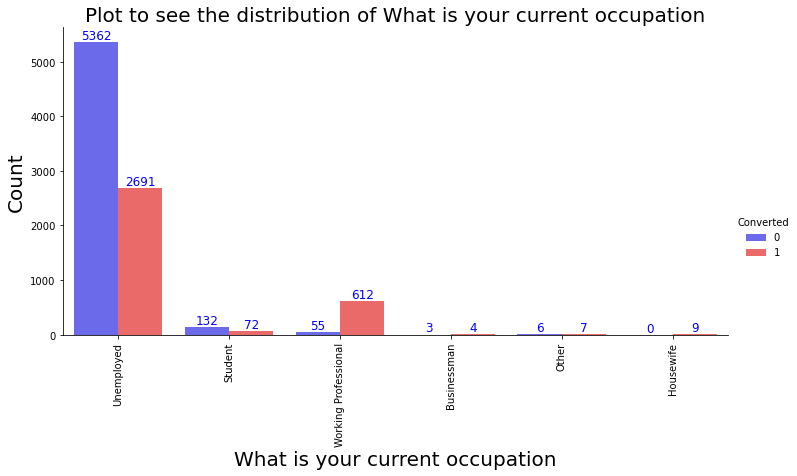

In [256]:
#Plot to see the distribution of the variable 'What is your current occupation'
showplot('What is your current occupation')

Inference:

Out 10 housewives, all 10 leads got converted. major conversions from the unemployed

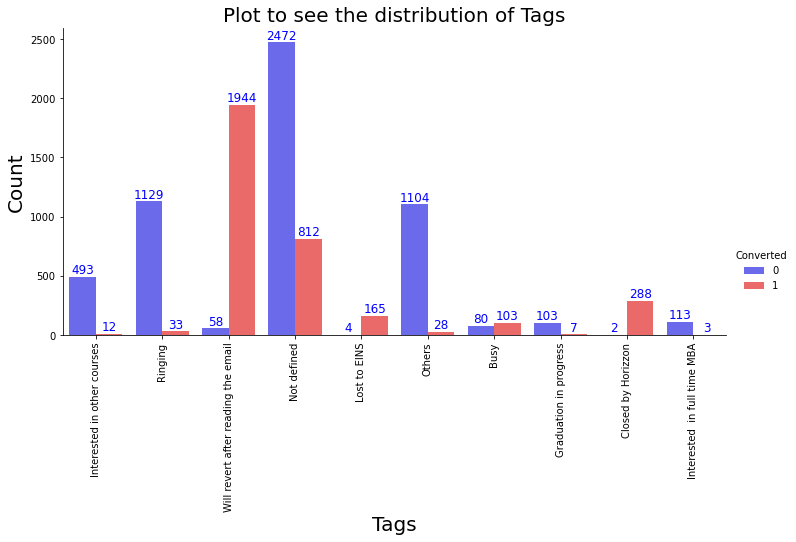

In [257]:
#Plot to see the distribution of the variable 'Tags'
showplot('Tags')

Inference:

From the above plot, it is high for Others which is not defined

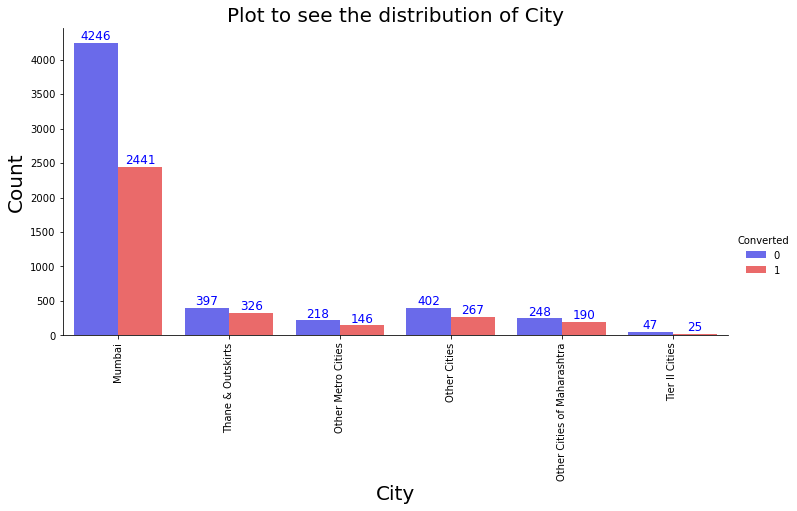

In [258]:
#Plot to see the distribution of the variable 'City'
showplot('City')

Inference:

Mumbai has the high rate of conversion, we can observe that from the plot

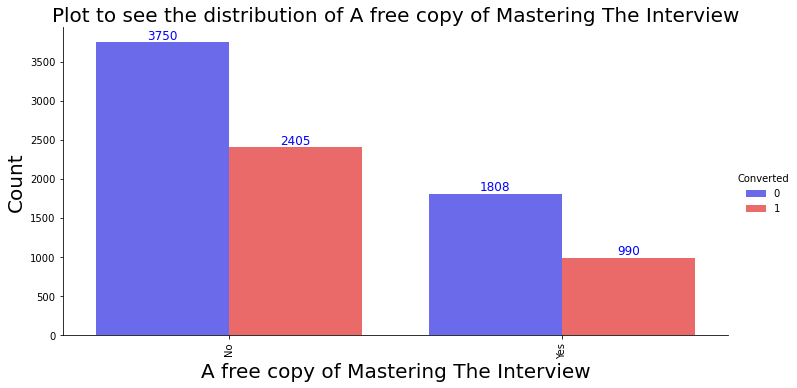

In [259]:
#Plot to see the distribution of the variable 'A free copy of Mastering The Interview'
showplot('A free copy of Mastering The Interview')

Inference:

From the above chat, the conversion rate is high for the people No for free copy of Mastering the interview

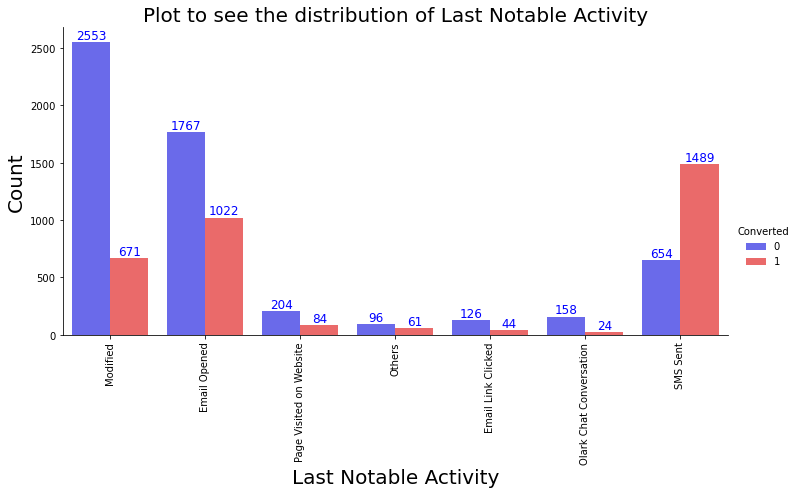

In [260]:
#Plot to see the distribution of the variable 'Last Notable Activity'
showplot('Last Notable Activity')

Inference:

It can be noticed that the conversion rate is high for "SMS Sent"

## 4.2. EDA on Numeric variables 

In [261]:
# Let us now check the percentage converted in df.

con = (sum(df['Converted'])/len(df['Converted'].index))*100
con

37.92025019546521

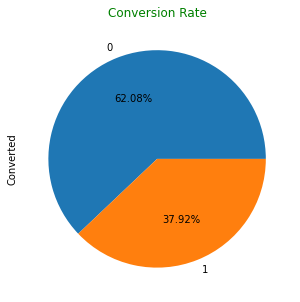

In [262]:
# visualization of 'Converted rate'
plt.figure(figsize=(5,5))
plt.title("Conversion Rate", color = 'green')
df.Converted.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

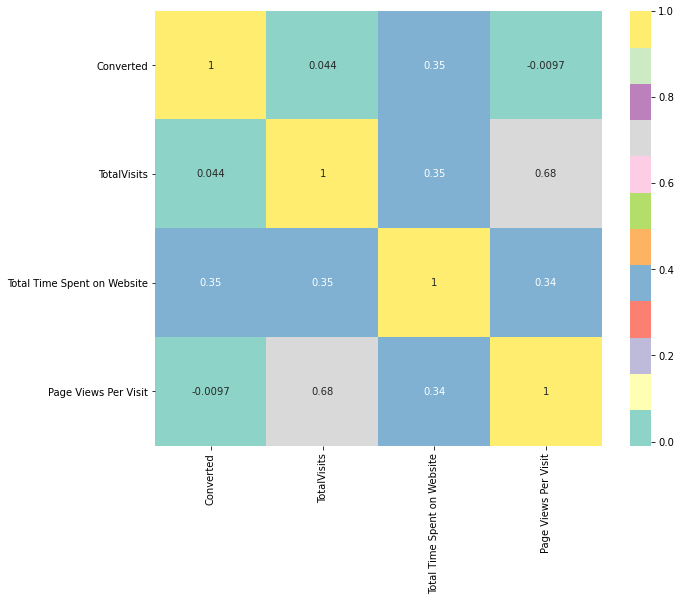

In [263]:
# Let us now view the correlation between numeric variables.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="Set3", annot=True)
plt.show()

Inference

- From the above heatmap, we can see that the, totalvisits is positively correlated with the conversion rate.

- Page views per visit is negatively correlated with the conversion.

- Page views per visit and totalvisits are highly correlated with each other.

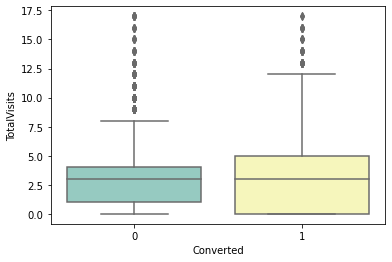

In [264]:
# boxplot to see the distribution of TotalVists w.r.t Converted 
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df, palette = 'Set3')
plt.show()

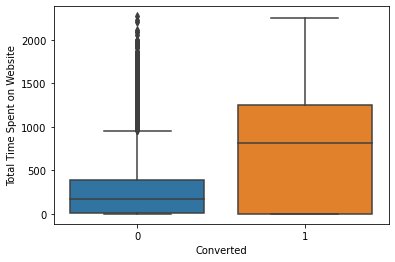

In [265]:
# boxplot to see the distribution of Total Time Spent on Website w.r.t Converted 
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

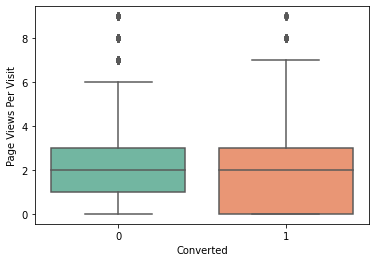

In [266]:
# boxplot to see the distribution of Page Views Per Visit w.r.t Converted 

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df, palette = 'Set2')
plt.show()

Inference

- TotalVisits median is same of both conversion and non-conversion rate

- Median is very high for Total Time Spent on Website for conversion 

- Page Views Per Visit median is same of both conversion and non-conversion rate


## <font color = green> Step 5 : Data Preparation </font>


In [267]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Not defined,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5,674,2,Email Opened,Not defined,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened


In [268]:
#getting categorical variables in a list

category_cols= df.select_dtypes(include=['object']).columns
category_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [269]:
# List of variables to map to the variables having Yes/No values

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

## 5.1. Creating Dummies for Categorical variables

In [270]:
#Let us now create the dummy variables for categorical variables and drop it's first column 
#And adding it to the main dataframe.
# For many variables, we can see values as 'Others'. Hence we are going to drop 'others' in some of 
#the variables rather than the first column.


dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

dummy.head(2)


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [271]:
# Concatenating with original df

df = pd.concat([df,dummy], axis = 1)


#### creating dummies for 'Specialization'

In [272]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization', drop_first = True)
dummy.head(2)

,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not defined,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0


In [273]:
# Concatenating with original df

df = pd.concat([df, dummy], axis = 1)

#### creating dummies for 'Lead source'

In [274]:

dummy = pd.get_dummies(df['Lead Source'], prefix ='Lead Source' , drop_first = True)
dummy.head(2)

,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0


In [275]:
# Concatenating with original df

df = pd.concat([df, dummy], axis = 1)

#### creating dummies for 'Last Activity'

In [276]:
dummy = pd.get_dummies(df['Last Activity'], prefix ='Last Activity', drop_first = True )
dummy.head(2)

,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0


In [277]:
# Concatenating with original df

df = pd.concat([df, dummy], axis = 1)

#### creating dummies for 'Last Notable Activity'

In [278]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix ='Last Notable Activity', drop_first = True )
dummy.head(2)

,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,1,0,0,0,0
1,1,0,0,0,0,0


In [279]:
# Concatenating with original df

df = pd.concat([df, dummy], axis = 1)

#### creating dummies for 'Tags'

In [280]:
dummy = pd.get_dummies(df['Tags'], prefix ='Tags', drop_first = True )
dummy.head(2)

,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not defined,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0


In [281]:
# Concatenating with original df

df = pd.concat([df, dummy], axis = 1)

In [282]:
# Dropping the original columns, since we have created dummies.

df.drop(category_cols,1,inplace = True)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not defined,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not defined,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5,674,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2,1532,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,305,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2,1428,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [283]:
# Listing the columns in our df.
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising', 'Specialization_Not defined',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
    

In [284]:
df.shape

(8953, 60)

## <font color = green> Step 6 : Splitting the Data into Training and Testing Sets </font>


In [285]:
from sklearn.model_selection import train_test_split

# Putting feature variable to y

X=df.drop('Converted', axis=1)
X.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not defined,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not defined,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,5,674,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [286]:
# Putting response variable to y

y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [287]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [288]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   TotalVisits                                           6267 non-null   int64
 1   Total Time Spent on Website                           6267 non-null   int64
 2   Page Views Per Visit                                  6267 non-null   int64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8
 5   Lead Origin_Lead Import                               6267 non-null   uint8
 6   What is your current occupation_Housewife             6267 non-null   uint8
 7   What is your current occupation_Other                 6267 non-null   uint8
 8   What is your current occupation_Student               6267 non-null   uint8

## <font color = green> Step 7 :  Feature Scaling</font>


In [289]:
# scaling numeric variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not defined,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not defined,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.486847,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.433303,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.093469,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2164,-0.380477,-0.154676,-0.093469,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1667,0.319082,1.258415,-0.620241,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## <font color = green> Step 8 :  Building a Logistic model </font>


In [290]:
import statsmodels.api as sm

In [291]:
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.6
Date:                Mon, 17 May 2021   Deviance:                       2349.1
Time:                        21:34:35   Pearson chi2:                 8.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6131      1.917     -1.363      0.173      -6.370       1.144
TotalVisits                                              0.1973      0.075      2.644      0.008       0.051       0.343
Total Time Spent on Website                              1.0818      0.064     16.954      0.000       0.957       1.207
Page Views Per Visit                                    -0.2457      0.090     -2.732      0.006      -0.422      -0.069
Lead Origin_Landing Page Submission                     -0.6994      0.240     -2.918      0.004      -1.169      -0.230
Lead Origin_Lead Add Form                                2.1467      1.040      2.064      0.039       0.109       4.185
Lead Origin_Lead Import                                 24.3665   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
What is your current occupation_Housewife               19.2778   1.97e+04      0.001      0.999   -3.86e+04    3.87e+04
What is your current occupation_Other                   -0.8955      2.362     -0.379      0.705      -5.524       3.733
What is your current occupation_Student                  0.2256      1.788      0.126      0.900      -3.278       3.730
What is your current occupation_Unemployed              -0.1627      1.682     -0.097      0.923      -3.459       3.134
What is your current occupation_Working Professional     0.8000      1.727      0.463      0.643      -2.584       4.184
City_Other Cities                                        0.2797      0.232      1.207      0.228      -0.175       0.734
City_Other Cities of Maharashtra                        -0.0719      0.289     -0.248      0.804      -0.639       0.495
City_Other Metro Cities                                 -0.0207      0.315     -0.066      0.948      -0.639       0.597
City_Thane & Outskirts                                  -0.0692      0.230     -0.301      0.763      -0.520       0.381
City_Tier II Cities                                      0.3241      0.632      0.513      0.608      -0.915       1.563
Specialization_Business Administration                  -0.5422      0.408     -1.328      0.184      -1.342       0.258
Specialization_E-Business                               -0.4546      0.689     -0.660      0.509      -1.804       0.895
Specialization_E-COMMERCE                               -0.2020      0.547     -0.369      0.712      -1.274       0.871
Specialization_International Business                   -0.6892      0.526     -1.309      0.190      -1.721       0.343
Specialization_Management_Specializations               -0.4748      0.309     -1.535      0.125      -1.081       0.131
Specialization_Media and Advertising                    -0

### Feature Selection Using RFE

In [292]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [293]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True])

In [294]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('What is your current occupation_Housewife', False, 16),
 ('What is your current occupation_Other', False, 17),
 ('What is your current occupation_Student', False, 22),
 ('What is your current occupation_Unemployed', False, 21),
 ('What is your current occupation_Working Professional', False, 2),
 ('City_Other Cities', False, 19),
 ('City_Other Cities of Maharashtra', False, 38),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 39),
 ('City_Tier II Cities', False, 18),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 43),
 ('Specialization_International Business', False, 26),
 ('Specialization_Management_Specializations', False, 29)

In [295]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [296]:
# RFE non- supported columns.
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising', 'Specialization_Not defined',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead So

#### Model 1

In [297]:
# Accessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.3
Date:                Mon, 17 May 2021   Deviance:                       2462.6
Time:                        21:34:41   Pearson chi2:                 8.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9254      0.097     -9.568      0.000      -1.115      -0.736
Total Time Spent on Website                       0.9850      0.055     17.809      0.000       0.877       1.093
Lead Origin_Landing Page Submission              -1.0622      0.118     -9.025      0.000      -1.293      -0.832
Lead Origin_Lead Add Form                         1.3659      0.461      2.964      0.003       0.463       2.269
Lead Source_Welingak Website                      4.0036      1.114      3.593      0.000       1.820       6.187
Last Activity_SMS Sent                            1.4575      0.228      6.382      0.000       1.010       1.905
Last Notable Activity_Modified                   -1.3794      0.151     -9.157      0.000      -1.675      -1.084
Last Notable Activity_Olark Chat Conversation    -1.9576      0.488     -4.008      0.000      -2.915      -1.000
Last Notable Activity_SMS Sent                    0.9035      0.262      3.447      0.001       0.390       1.417
Tags_Closed by Horizzon                           7.2379      1.019      7.101      0.000       5.240       9.236
Tags_Interested  in full time MBA                -1.5622      0.626     -2.496      0.013      -2.789      -0.335
Tags_Interested in other courses                 -2.2881      0.417     -5.490      0.000      -3.105      -1.471
Tags_Lost to EINS                                 5.8172      0.610      9.529      0.000       4.621       7.014
Tags_Others                                      -2.6442      0.240    -10.996      0.000      -3.116      -2.173
Tags_Ringing                                     -3.5163      0.245    -14.348      0.000      -3.997      -3.036
Tags_Will revert after reading the email          4.6099      0.189     24.413      0.000       4.240       4.980
=================================================================================================================
"""

In [298]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.15
1,Lead Origin_Landing Page Submission,2.05
2,Lead Origin_Lead Add Form,1.88
5,Last Notable Activity_Modified,1.73
14,Tags_Will revert after reading the email,1.73
3,Lead Source_Welingak Website,1.35
13,Tags_Ringing,1.28
12,Tags_Others,1.27
0,Total Time Spent on Website,1.25


The variable 'Last Notable Activity_SMS Sent' is having high vif of 6.22, which is highly correlated with 'Last Activity_SMS Sent'. 
Hence we are removing this column to aviod multicollinearity.

In [299]:
# Dropping 'Last_Notable_Activity_SMS_Sent'

col = col.drop('Last Notable Activity_SMS Sent',1)

### Model 2:

In [300]:
# Accessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.3
Date:                Mon, 17 May 2021   Deviance:                       2474.7
Time:                        21:34:41   Pearson chi2:                 8.83e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8422      0.092     -9.113      0.000      -1.023      -0.661
Total Time Spent on Website                       0.9811      0.055     17.784      0.000       0.873       1.089
Lead Origin_Landing Page Submission              -1.0817      0.117     -9.277      0.000      -1.310      -0.853
Lead Origin_Lead Add Form                         1.3455      0.465      2.892      0.004       0.434       2.257
Lead Source_Welingak Website                      3.9825      1.118      3.561      0.000       1.791       6.174
Last Activity_SMS Sent                            2.1310      0.117     18.227      0.000       1.902       2.360
Last Notable Activity_Modified                   -1.6973      0.125    -13.533      0.000      -1.943      -1.451
Last Notable Activity_Olark Chat Conversation    -2.0477      0.490     -4.178      0.000      -3.008      -1.087
Tags_Closed by Horizzon                           7.4205      1.020      7.274      0.000       5.421       9.420
Tags_Interested  in full time MBA                -1.5892      0.632     -2.516      0.012      -2.827      -0.351
Tags_Interested in other courses                 -2.2458      0.414     -5.421      0.000      -3.058      -1.434
Tags_Lost to EINS                                 5.9851      0.613      9.771      0.000       4.785       7.186
Tags_Others                                      -2.5724      0.237    -10.873      0.000      -3.036      -2.109
Tags_Ringing                                     -3.4008      0.240    -14.170      0.000      -3.871      -2.930
Tags_Will revert after reading the email          4.6868      0.192     24.466      0.000       4.311       5.062
=================================================================================================================
"""

In [301]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.04
2,Lead Origin_Lead Add Form,1.88
13,Tags_Will revert after reading the email,1.68
4,Last Activity_SMS Sent,1.51
5,Last Notable Activity_Modified,1.44
3,Lead Source_Welingak Website,1.34
12,Tags_Ringing,1.27
11,Tags_Others,1.26
0,Total Time Spent on Website,1.25
7,Tags_Closed by Horizzon,1.23


Tags_Interested  in full time MBA column p-value is 0.012. Hence, dropping this column and see if our model improves

In [302]:
# Dropping Tags_Interested  in full time MBA column
col = col.drop('Tags_Interested  in full time MBA', 1)

### Model 3

In [303]:
# Accessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.0
Date:                Mon, 17 May 2021   Deviance:                       2484.0
Time:                        21:34:41   Pearson chi2:                 8.93e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8713      0.092     -9.477      0.000      -1.051      -0.691
Total Time Spent on Website                       0.9726      0.055     17.729      0.000       0.865       1.080
Lead Origin_Landing Page Submission              -1.0854      0.116     -9.333      0.000      -1.313      -0.857
Lead Origin_Lead Add Form                         1.3343      0.465      2.868      0.004       0.422       2.246
Lead Source_Welingak Website                      4.0145      1.119      3.589      0.000       1.822       6.207
Last Activity_SMS Sent                            2.1563      0.117     18.473      0.000       1.928       2.385
Last Notable Activity_Modified                   -1.7137      0.125    -13.687      0.000      -1.959      -1.468
Last Notable Activity_Olark Chat Conversation    -2.0398      0.489     -4.171      0.000      -2.998      -1.081
Tags_Closed by Horizzon                           7.4654      1.020      7.318      0.000       5.466       9.465
Tags_Interested in other courses                 -2.2110      0.415     -5.333      0.000      -3.024      -1.398
Tags_Lost to EINS                                 6.0285      0.612      9.844      0.000       4.828       7.229
Tags_Others                                      -2.5501      0.237    -10.781      0.000      -3.014      -2.087
Tags_Ringing                                     -3.3835      0.240    -14.106      0.000      -3.854      -2.913
Tags_Will revert after reading the email          4.7242      0.192     24.660      0.000       4.349       5.100
=================================================================================================================
"""

In [304]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.03
2,Lead Origin_Lead Add Form,1.88
12,Tags_Will revert after reading the email,1.67
4,Last Activity_SMS Sent,1.51
5,Last Notable Activity_Modified,1.42
3,Lead Source_Welingak Website,1.34
11,Tags_Ringing,1.26
0,Total Time Spent on Website,1.25
10,Tags_Others,1.25
7,Tags_Closed by Horizzon,1.23


Model 3 seems to be good with the variables with p-value 0 and vif value < 5, which is tecchnically significant.
Hence we stop our model building here.

## <font color = green> Step 9 :  Making Predictions on the Train Set </font>


In [305]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


9196    0.199980
4696    0.038394
3274    0.395341
2164    0.007059
1667    0.993799
7024    0.151928
8018    0.022768
778     0.104567
6942    0.031273
4440    0.092849
dtype: float64

In [306]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19998023, 0.03839438, 0.39534051, 0.00705907, 0.99379912,
       0.15192789, 0.02276779, 0.10456737, 0.03127267, 0.09284867])

In [307]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,9196,1,0.199980
1,4696,0,0.038394
2,3274,0,0.395341
3,2164,0,0.007059
4,1667,1,0.993799


In [308]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,Predicted
0,9196,1,0.199980,0
1,4696,0,0.038394,0
2,3274,0,0.395341,0
3,2164,0,0.007059,0
4,1667,1,0.993799,1


In [309]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3724  158]
 [ 284 2101]]


In [310]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9294718366044359


In [311]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] ))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3882
           1       0.93      0.88      0.90      2385

    accuracy                           0.93      6267
   macro avg       0.93      0.92      0.92      6267
weighted avg       0.93      0.93      0.93      6267



## 9.1. Metrics beyond simply accuracy


In [312]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [313]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8809224318658281

In [314]:
# Let us calculate specificity
TN / float(TN+FP)

0.9592993302421432

In [315]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04070066975785677


In [316]:
# positive predictive value 
print (TP / float(TP+FP))

0.9300575475874281


In [317]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9291417165668663


### Inference:

Based on the above statistics,
- Accuracy - 93%
Sensitivity - 88%
Specificity - 96%
positive predictive - 93%
Negative predictive - 93%

- we can say that our trained model is currently highly specific but not very sensitive. 
- Our objective is to create a highly sensitive model with 80% sensitivity. Let us find cut-off  values using ROC curves to improve this.

## 9.2. ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [318]:
# defining ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [319]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

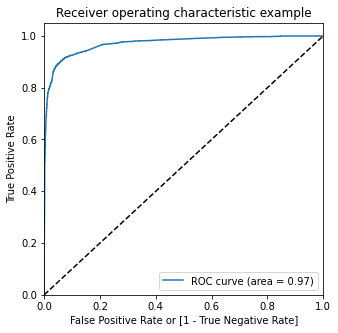

In [320]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

ROC curve value should be close to 1 and the value we got is 0.97, indicating a good predictive model.

## 9.3.  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [321]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9196,1,0.199980,0,1,1,0,0,0,0,0,0,0,0
1,4696,0,0.038394,0,1,0,0,0,0,0,0,0,0,0
2,3274,0,0.395341,0,1,1,1,1,0,0,0,0,0,0
3,2164,0,0.007059,0,1,0,0,0,0,0,0,0,0,0
4,1667,1,0.993799,1,1,1,1,1,1,1,1,1,1,1


In [322]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.833573  0.971488  0.748841
0.2   0.2  0.900910  0.932914  0.881247
0.3   0.3  0.921494  0.915723  0.925039
0.4   0.4  0.926600  0.897275  0.944616
0.5   0.5  0.929472  0.880922  0.959299
0.6   0.6  0.927078  0.859958  0.968315
0.7   0.7  0.913356  0.805451  0.979650
0.8   0.8  0.907292  0.776939  0.987378
0.9   0.9  0.886229  0.714885  0.991499


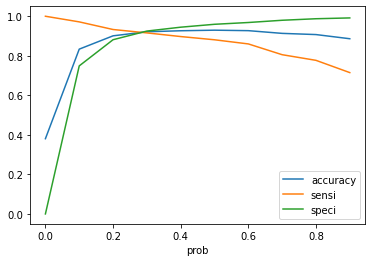

In [323]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [324]:

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,9196,1,0.199980,0,1,1,0,0,0,0,0,0,0,0,0
1,4696,0,0.038394,0,1,0,0,0,0,0,0,0,0,0,0
2,3274,0,0.395341,0,1,1,1,1,0,0,0,0,0,0,1
3,2164,0,0.007059,0,1,0,0,0,0,0,0,0,0,0,0
4,1667,1,0.993799,1,1,1,1,1,1,1,1,1,1,1,1


In [325]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Lead ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Lead ID,final_Predicted,Lead_Score
0,1,0.199980,9196,0,20
1,0,0.038394,4696,0,4
2,0,0.395341,3274,1,40
3,0,0.007059,2164,0,1
4,1,0.993799,1667,1,99


In [326]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9214935375777884

In [327]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3591,  291],
       [ 201, 2184]], dtype=int64)

In [328]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [329]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9157232704402516

In [330]:
# Let us calculate specificity
TN / float(TN+FP)

0.9250386398763524

In [331]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07496136012364761


In [332]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8824242424242424


In [333]:
# Negative predictive value
print (TN / float(TN+ FN))

0.946993670886076


### Inference:

From the above calculations, we see that, when we selected optimal cutoff as 0.33, all the metrices like Accuracy, Sensitivity & Specificity are all around 80%

Hence we can say that, ours is highly sensitive model with 80% sensitivity

## 9.4. Precision and Recall

In [334]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3591,  291],
       [ 201, 2184]], dtype=int64)

In [335]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8824242424242424

In [336]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9157232704402516

Using sklearn utilities for the same

In [337]:
from sklearn.metrics import precision_score, recall_score

In [338]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8824242424242424

In [339]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9157232704402516

### Inference

From the above scores we note that our model is doing well, defined by Precision score as 88% and recall as 91%.


## 9.5. Precision and recall tradeoff

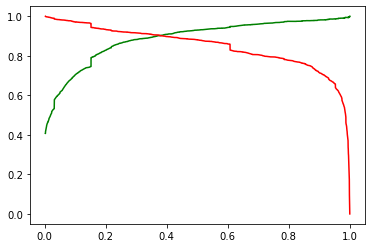

In [340]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Inference:

We see that the precision vs recall tradeoff value from the above graph is at 0.4

## <font color = green> Step 10 :  Making predictions on the test set </font>


In [341]:
#Lets scale the test data

num_cols=X_test.select_dtypes(include=['int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not defined,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not defined,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,-0.132822,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.393374,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.132822,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6915,0.242505,-0.628665,-0.132822,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.393374,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [342]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,0,1,0,0,0,0,0,0,1,0
984,-0.550262,1,0,0,1,1,0,0,0,0,1,0,0
8135,0.812462,1,0,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,1,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,0,0,1


In [343]:
X_test_sm = sm.add_constant(X_test)

## 10.1. Making predictions

In [344]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.029693
984     0.009958
8135    0.729054
6915    0.002595
2712    0.969022
244     0.003149
4698    0.060828
8287    0.030697
6791    0.988970
8970    0.006189
dtype: float64

In [345]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [346]:
# Let's see the head
y_pred_1.head()

,0
7681,0.029693
984,0.009958
8135,0.729054
6915,0.002595
2712,0.969022


In [347]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [348]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [349]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [350]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.029693
1,0,984,0.009958
2,0,8135,0.729054
3,0,6915,0.002595
4,1,2712,0.969022


In [351]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.029693
1,0,984,0.009958
2,0,8135,0.729054
3,0,6915,0.002595
4,1,2712,0.969022


In [352]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [353]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.029693,3
1,984,0,0.009958,1
2,8135,0,0.729054,73
3,6915,0,0.002595,0
4,2712,1,0.969022,97


In [354]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.029693,3,0
1,984,0,0.009958,1,0
2,8135,0,0.729054,73,1
3,6915,0,0.002595,0,0
4,2712,1,0.969022,97,1


In [355]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.926656738644825

In [356]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1561,  115],
       [  82,  928]], dtype=int64)

In [357]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9157232704402516

In [358]:
# Let us calculate specificity
TN / float(TN+FP)

0.9250386398763524

In [359]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8897411313518696

In [360]:
#Recall

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9188118811881189

### Inference on Test set

The metrices on test set are as per below

- Sensitivity = 91%
- Specificity = 91%
- Accuracy = 92%

The above metrices percentage is almost similar. Hence our model is predicting well.

### Insights

Hot Leads are identified as 'Customers having lead score of 33 or above and the Sales team should first approve them to increase their conversion rate.

### Suggestions to X Education Team:

Below are the points observed to incerase the conversion rate for the X Education Company:

- Persons who spens more time on the wensites are likely to be convert into the hot leads for X Education. Hence they should focus more on people like that.

- They can provide scholarships to Students to avail their courses.

- The customers who having the score below 33 are considered to be the cold leads, which is having very less probability of conversion rate.

- Last Activity_SMS Sent and Tags_Closed by Horizzon, activities can be focussed more


## <font color = green> Thank You !!! </font>
